# Data Summary

In [1]:
import pandas as pd

# name of the data file with NIS values
data_file = 'NIS_data.csv'

# load data
data = pd.read_csv(data_file, sep=' ', skiprows=[0, 1, 2])

# lidar-only NISes (correspond to sensor type 0)
lidar_data = data.query("SENSOR_TYPE==0")['NIS'].values
lidar_data_summary = data.query("SENSOR_TYPE==0")['NIS'].describe(percentiles=[0.05, 0.95])

# radar-only NISes (correspond to sensor type 1)
radar_data = data.query("SENSOR_TYPE==1")['NIS'].values
radar_data_summary = data.query("SENSOR_TYPE==1")['NIS'].describe(percentiles=[0.05, 0.95])

print('__LIDAR__\n' + str(lidar_data_summary))
print()
print('__RADAR__\n' + str(radar_data_summary))

__LIDAR__
count    249.000000
mean       1.798351
std        1.890296
min        0.009389
5%         0.143086
50%        1.223700
95%        4.919376
max       15.656500
Name: NIS, dtype: float64

__RADAR__
count    249.000000
mean       3.142740
std        5.078179
min        0.128260
5%         0.307810
50%        2.157110
95%        7.047402
max       74.745300
Name: NIS, dtype: float64


In the unscented Kalman filter, there was a need to adjust linear acceleration and yaw acceleration noise parameters. The resulting NIS consistency check values for 5th and 95th percentiles are quite close to the expected values 0.352 and 7.815 of the chi-squared distribution with 3 degrees of freedom correspondingly.  It means that these parameters are consistent.

# Graphs

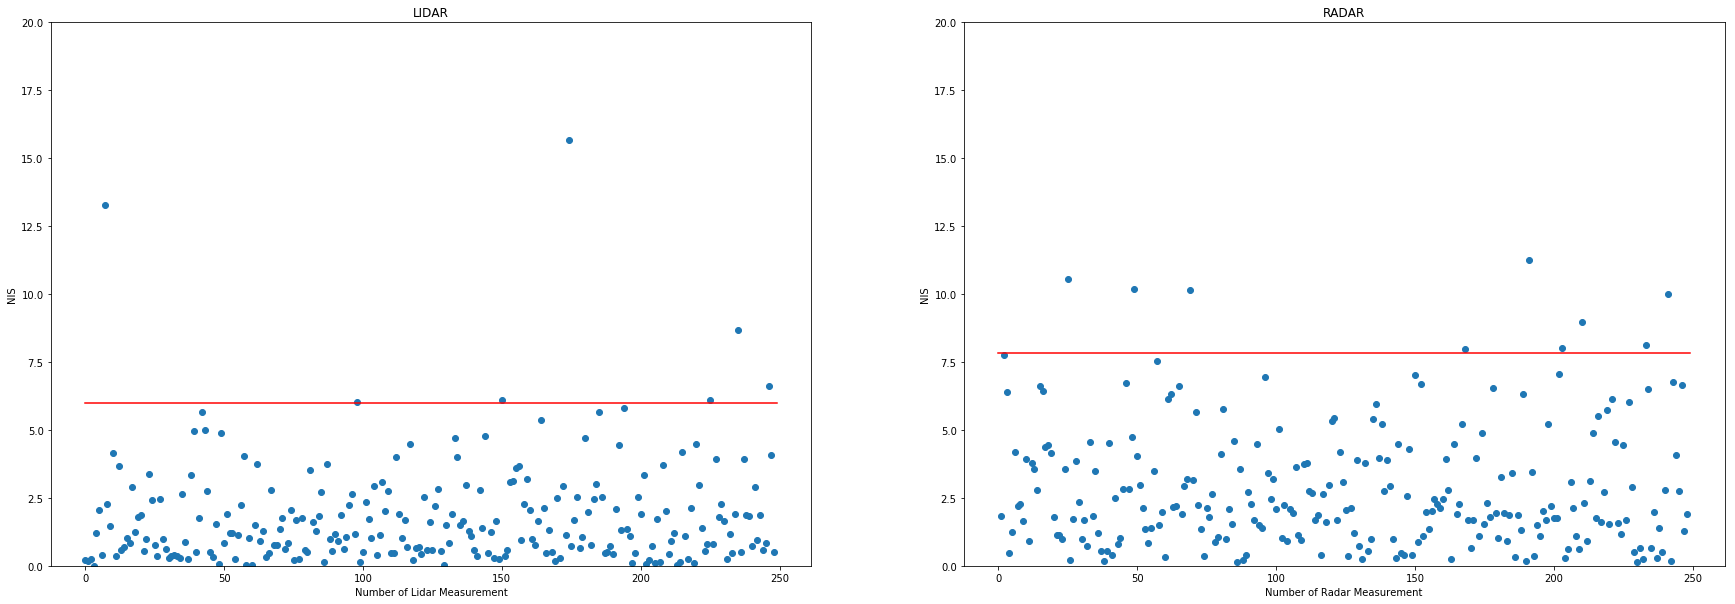

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# visualize NISes for lidar and radar correspondingly
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

# lidar
ax1.scatter(np.arange(len(lidar_data)), lidar_data)
ax1.plot([0, len(lidar_data)], [5.991, 5.991], c='red')
ax1.set_xlabel('Number of Lidar Measurement')
ax1.set_ylabel('NIS')
ax1.set_title('LIDAR')
ax1.set_ylim([0.0, 20.0])

# radar
ax2.scatter(np.arange(len(radar_data)), radar_data)
ax2.plot([0, len(radar_data)], [7.815, 7.815], c='red')
ax2.set_xlabel('Number of Radar Measurement')
ax2.set_ylabel('NIS')
ax2.set_title('RADAR')
ax2.set_ylim([0.0, 20.0])

plt.show()